# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


Ответы:

- np.array([[1, 0], [0, -1]])
- np.array([[1, 0], [0, -1]])
- np.array([[1, 0], [0, -1]])

В пунктах выше - ответы одинаковые так как диагональная, ортогональная, но не единичная по определению и есть upper-triangular и lower-triangular

- np.array([[2, 3], [1, 2]])

Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import decomposition
from sklearn.metrics import mean_squared_error

In [2]:
m = np.array([[2, 2],
              [1, 3]])
print(f'Собственные значения матрицы m: {np.linalg.eig(m)[0][0]} и {np.linalg.eig(m)[0][1]}')
print(f'Собственные вектора матрицы m: {np.linalg.eig(m)[1][:,0]} и {np.linalg.eig(m)[1][:,1]}')

Собственные значения матрицы m: 1.0 и 4.0
Собственные вектора матрицы m: [-0.89442719  0.4472136 ] и [-0.70710678 -0.70710678]


### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [3]:
m = np.array([[1, 2],
              [2,3]])

np.array(np.linalg.eig(m)[1].dot(np.diag(np.linalg.eig(m)[0])).dot(np.linalg.eig(m)[1].T))

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*





--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

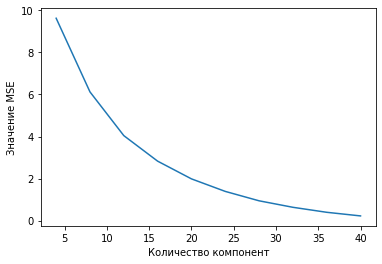

In [4]:
X, y = load_digits(return_X_y=True)
i = 40
err = []
indices = []
while i > 0:
    pca = decomposition.PCA(n_components=i)
    pca.fit(X)
    X_t = pca.transform(X)
    X_i = pca.inverse_transform(X_t)
    err.append(mean_squared_error(X, X_i))
    indices.append(i)
    i = i - 4
    
plt.plot(indices, err)
plt.xlabel('Количество компонент')
plt.ylabel('Значение MSE')
plt.show()

Мы видим обратную экспоненциальную зависимость, то есть увеличение количества компонент приводит к снижению очности восстановления картинки.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
